# Exercise - 1

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import shift
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
mnist = fetch_openml('mnist_784', as_frame= False, parser= 'auto')

In [44]:
data, target = mnist['data'], mnist['target']

In [45]:
X_train, X_test, y_train, y_test = data[:60000], data[60000:], target[:60000], target[60000:]

In [46]:
knn_clf = KNeighborsClassifier()

In [47]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
knn_clf.score(X_test, y_test)

0.9688

In [49]:
param_grid = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3, 4, 5, 6]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv= 3)

In [50]:
grid_search.fit(X_train[:10000], y_train[:10000])

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [51]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [52]:
grid_search.best_score_

0.9397994088551026

In [53]:
grid_search.best_estimator_.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [54]:
tuned_model_score = grid_search.score(X_test, y_test)

In [55]:
tuned_model_score

0.9714

# Exercise - 2

In [56]:
def digit_plot(data: np.ndarray) -> None:
    img = data.reshape(28, 28)
    plt.imshow(img, cmap= 'binary')
    plt.axis('off')
    plt.show()

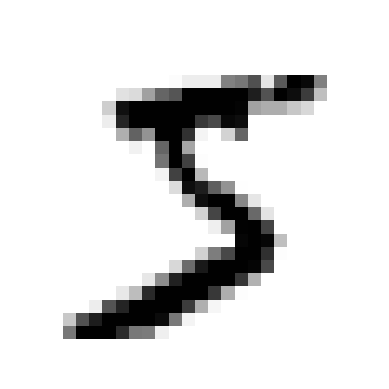

In [57]:
digit_plot(X_train[0])

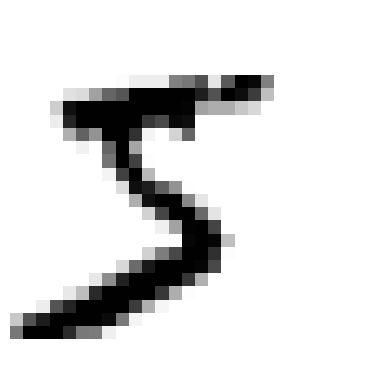

In [58]:
img = X_train[0].reshape((28, 28))
digit_plot(shift(img, [0, -4]))

In [59]:
def data_shift_in_4_directions(image_vector: np.ndarray, target: str) -> np.ndarray:
    image = image_vector.reshape((28, 28))
    return np.vstack(
        (
            image_vector,
            shift(image, [1, 0]).reshape((784,)), 
            shift(image, [0, 1]).reshape((784,)), 
            shift(image, [-1, 0]).reshape((784,)), 
            shift(image, [0, -1]).reshape((784,))
        )
    ), np.repeat(target, 5)

In [60]:
data_shift_in_4_directions(X_train[0], '5')

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array(['5', '5', '5', '5', '5'], dtype='<U1'))

In [61]:
extended_data = [data_shift_in_4_directions(X, y) for X, y in zip(X_train, y_train)]

In [62]:
list_X, list_y = [], []
for x, y in extended_data:
    list_X.append(x)
    list_y.append(y)

In [63]:
extended_X_train = np.vstack(list_X)

In [64]:
extended_y_train = np.hstack(list_y)

In [65]:
extended_y_train

array(['5', '5', '5', ..., '8', '8', '8'], dtype='<U1')

In [66]:
grid_search.best_estimator_.fit(extended_X_train, extended_y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [67]:
augmented_model_score = grid_search.best_estimator_.score(X_test, y_test)

In [68]:
augmented_model_score

0.9763

In [81]:
error_rate_change = (1 - augmented_model_score) / (1 - tuned_model_score) - 1     
# - 1 at the end gives relative change in error rate. For example, if the ratio is 1.2, subtracting 1 gives 0.2, indicating a 20% increase in error rate for the augmented model compared to the tuned model

In [82]:
print(f'{error_rate_change = :.0%}')

error_rate_change = -17%
